### **Estatística: Transformação Logarítmica, Normalização e Outras Transformações**

#### **1. Bibliotecas**

In [ ]:
import yfinance as yf
import vectorbt as vbt
import plotly.graph_objects as go
import plotly.express as px

#### **2.2. Transformação de dados**

##### **2.2.1. Problemas comuns**

* Comparação de escalas/distribuições diferentes
* Permite trabalhar com dados não normais
* Avaliar relações não-lineares
* Séries temporais longas

Este exemplo abaixo de drawdown com valores nominais, nos mostra 'picos' e 'vales' praticamente impercetíveis quando temos uma grande linha temporal 

In [ ]:
ibov_sp500 = yf.download(['^BVSP','^GSPC'], period='max')['Close']
ibov_sp500['^GSPC'].vbt.drawdowns.plot(width=1000).show()

In [ ]:
ibov_sp500 = yf.download(['^BVSP','^GSPC'], period='max')['Close']

🟡 Gráfico Original:  
Os valores do S&P 500 mostravam uma grande disparidade ao longo do tempo, dificultando a análise de períodos específicos.

In [ ]:
fig = go.Figure()

# Linha S&P500
fig.add_trace(go.Scatter(x=ibov_sp500.index, y=ibov_sp500['^GSPC'], name='S&P 500', line=dict(color='blue', width=3)))

# Cores retângulos verticais 
fig.add_vrect(x0='1973', x1='1985', fillcolor="#000000", opacity=0.3, line_width=0)
fig.add_vrect(x0='2000-06', x1='2003-06', fillcolor="blue", opacity=0.3, line_width=0)
fig.add_vrect(x0='2008', x1='2013', fillcolor="green", opacity=0.3, line_width=0)
fig.add_vrect(x0='2020', x1='2021', fillcolor="red", opacity=0.3, line_width=0)

# Add annotations at the top
y_max = ibov_sp500['^GSPC'].max()
fig.add_trace(go.Scatter(x=['1979-01-01'], y=[5100], mode="text", text="<b>Petróleo<br>e Energia</b>", textposition="top center", showlegend=False))
fig.add_trace(go.Scatter(x=['2002-01-01'], y=[5100], mode="text", text="<b>Bolha da <br>Internet</b>", textposition="top center", showlegend=False))
fig.add_trace(go.Scatter(x=['2010-07-01'], y=[5100], mode="text", text="<b>Crise<br>Subprimes</b>", textposition="top center", showlegend=False))
fig.add_trace(go.Scatter(x=['2020-06-01'], y=[5500], mode="text", text='<b>"Covid"</b>', textposition="top center", showlegend=False))

# Update layout
fig.update_layout(title='', xaxis_title="<b>Data", yaxis_title="<b>Valor nominal (USD)", legend_title="",
                  font=dict(family="Arial, Arial, Arial",size=18,color="black"),paper_bgcolor="#f7f8fa")

fig.update_layout(xaxis_rangeslider_visible=False, margin=dict(l=120, r=20, t=20, b=20), template='simple_white',
                  width=1000, height=500, legend=dict(orientation="h", yanchor="bottom", y=0.9, xanchor="right", x=0.15),
                  xaxis=dict(range=['1950', '2025']))

fig.show()


🟢 Gráfico com Transformação Logarítmica:  
Após a aplicação da transformação logarítmica, os valores foram ajustados para uma escala linear, facilitando a identificação de tendências e comparações entre diferentes períodos.

In [ ]:
fig = go.Figure()

# Adicionando o gráfico do S&P 500
fig.add_trace(go.Scatter(x=ibov_sp500.index, y=np.log(ibov_sp500['^GSPC']),
                         name='S&P 500', line=dict(color='blue', width=3)))

# Adicionando retângulos verticais
fig.add_vrect(x0='1973', x1='1985', fillcolor="#000000", opacity=0.3, line_width=0)
fig.add_vrect(x0='2000-06', x1='2003-06', fillcolor="blue", opacity=0.3, line_width=0)
fig.add_vrect(x0='2008', x1='2013', fillcolor="green", opacity=0.3, line_width=0)
fig.add_vrect(x0='2020', x1='2021', fillcolor="red", opacity=0.3, line_width=0)

# Ajuste as posições y para alinhar as anotações
fig.add_trace(go.Scatter(x=['1979-01-01'], y=[np.log(10)], mode="text", text="<b>Petróleo<br>e Energia</b>", textposition="bottom center", showlegend=False))
fig.add_trace(go.Scatter(x=['2002-01-01'], y=[np.log(10)], mode="text", text="<b>Bolha da <br>Internet</b>", textposition="bottom center", showlegend=False))
fig.add_trace(go.Scatter(x=['2010-07-01'], y=[np.log(10)], mode="text", text="<b>Crise<br>Subprimes</b>", textposition="bottom center", showlegend=False))
fig.add_trace(go.Scatter(x=['2020-06-01'], y=[np.log(10)], mode="text", text='<b>"Covid"</b>', textposition="bottom center", showlegend=False))

# Configurando o layout do gráfico
fig.update_layout(title='', xaxis_title="<b>Data", yaxis_title="<b>Valor nominal (USD)", legend_title="",
                  font=dict(family="Arial, Arial, Arial", size=18, color="black"), paper_bgcolor="#f7f8fa")

fig.update_layout(xaxis_rangeslider_visible=False, margin=dict(l=120, r=20, t=20, b=50), template='simple_white',
                  width=1000, height=500, legend=dict(orientation="h", yanchor="bottom", y=0.9, xanchor="right", x=0.15),
                  xaxis=dict(range=['1950', '2025']))

fig.show()


Essa transformação facilita a comparação direta, trazendo os valores para uma escala linear.

##### **2.2.2. Transformação logarítmica: "distância relativa x absoluta"**

A transformação logarítmica é uma técnica fundamental na análise financeira, especialmente quando lidamos com valores que variam em ordens de magnitude diferentes. Uma das principais vantagens do uso de logaritmos é a capacidade de converter multiplicações em somas, o que facilita a análise de "distâncias relativas" ao invés de "distâncias absolutas".

###### **Distância Absoluta vs. Distância Relativa:**

- Distância Absoluta refere-se à diferença direta entre valores. Por exemplo, a diferença absoluta entre 1000 e 100 é 900.  

- Distância Relativa leva em consideração o valor proporcional ou percentual da diferença. Por exemplo, a diferença relativa entre 1000 e 100 é um fator de 10 (ou seja, 1000 é 10 vezes maior que 100).

**Nesta imagem temos:**

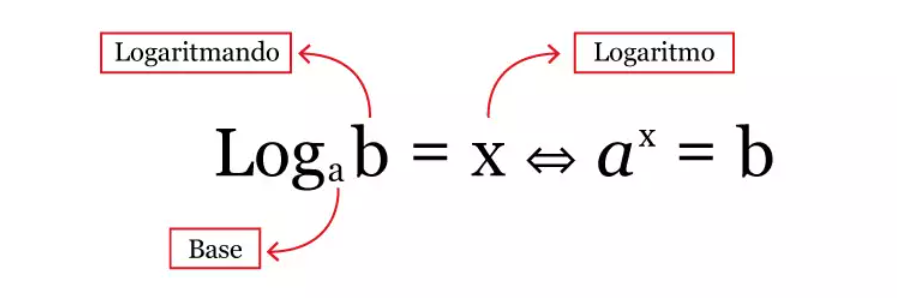

- Base (a): A base do logaritmo determina a escala da transformação. No caso mais comum em finanças, usamos a base ee (logaritmo natural). 

- Logaritmando (b): Este é o valor sobre o qual estamos aplicando o logaritmo.  

- Logaritmo (x): O resultado do logaritmo indica a potência à qual a base deve ser elevada para alcançar o logaritmando.

**Aplicação Prática em Análise Financeira:**

Diferença entre distâncias absolutas e relativas com um exemplo de análise de ações:

In [ ]:
ibov = ibov_sp500[ibov_sp500.index>='2000']

fig = px.line(ibov, x=ibov.index, y=ibov['^BVSP'], width=1000, height=400)
fig.show()

Este primeiro gráfico mostra os preços absolutos do índice IBOVESPA. As variações podem ser difíceis de interpretar, especialmente para grandes valores.

In [ ]:
fig = px.line(ibov, x=ibov.index, y=np.log(ibov['^BVSP']), width=1000, height=400)
fig.show()

Este segundo gráfico aplica a transformação logarítmica aos preços do IBOVESPA, convertendo as variações em distâncias relativas.

Referências:

* https://www.educamaisbrasil.com.br/enem/matematica/logaritmo

* https://www.infoescola.com/matematica/logaritmo-natural/

##### **2.2.3. Normalização**

Neste exemplo, os dados obtidos de S&P 500 e IBOVESPA são divididos por seus valores iniciais, trazendo ambos os índices para uma base comum e facilitando a análise comparativa.

In [ ]:
ibov_sp500_tickers = ['^BVSP', '^GSPC']
ibov_sp500 = yf.download(ibov_sp500_tickers, period='max')['Close']

In [ ]:
ibov_sp500_red = ibov_sp500.dropna()
ibov_sp500_red = ibov_sp500_red[ibov_sp500_red.index>='2000']

In [ ]:
ibov_sp500_red

Representação do gráfico antes da normalização

In [ ]:
fig = go.Figure()

fig.add_trace(go.Scatter(x=ibov_sp500_red.index, y=ibov_sp500_red['^GSPC'],
                         name='S&P 500', line=dict(color='blue', width=3)))

fig.add_trace(go.Scatter(x=ibov_sp500_red.index, y=ibov_sp500_red['^BVSP'],
                         name='IBOV', line=dict(color='#008000', width=3)))

fig.update_layout(xaxis_rangeslider_visible=False, margin=dict(l=120, r=20, t=20, b=20), template = 'simple_white',
                  paper_bgcolor="#f7f8fa", width=800,height=400)
fig.show()

In [ ]:
ibov_sp500_normalizado = ibov_sp500_red/ibov_sp500_red.iloc[0]
ibov_sp500_normalizado

Representação do gráfico depois da normalização

In [ ]:
fig = go.Figure()

ibov_sp500_normalizado

fig.add_trace(go.Scatter(x=ibov_sp500_normalizado.index, y=ibov_sp500_normalizado['^GSPC'],
                         name='S&P 500', line=dict(color='blue', width=3)))

fig.add_trace(go.Scatter(x=ibov_sp500_normalizado.index, y=ibov_sp500_normalizado['^BVSP'],
                         name='IBOV', line=dict(color='#008000', width=3)))

fig.update_layout(xaxis_rangeslider_visible=False, margin=dict(l=120, r=20, t=20, b=20), template = 'simple_white',
                  paper_bgcolor="#f7f8fa", width=800,height=400)
fig.show()

##### **2.2.4. Transformação "scale" (padronização)**

Quando trabalhamos com dados financeiros de diferentes ativos, frequentemente encontramos problemas de escala. Ativos diferentes podem ter volumes de negociação que variam em ordens de magnitude, tornando difícil a comparação direta. A padronização (ou normalização) transforma os dados para que tenham uma média de 0 e uma variância de 1. Isso permite comparações diretas entre os ativos.

In [ ]:
# Baixando os dados pela VectorBT
tickers = ['VALE3.SA', 'PETR4.SA', 'ITUB4.SA']

Major_IBOV_vol = vbt.YFData.download(tickers, start='5 year ago', interval='1d').get('Volume')
Major_IBOV_vol

**Dados Originais:**  
Inicialmente, visualizamos os volumes de negociação dos ativos VALE3, PETR4 e ITUB4 em suas escalas originais. As diferenças nas magnitudes dos volumes são evidentes, tornando a comparação direta difícil.

In [ ]:
Major_IBOV_vol.plot()

**Histograma dos Dados Originais:**  
O histograma dos volumes originais mostra distribuições distintas para cada ativo, com diferentes amplitudes e frequências de valores.

In [ ]:
Major_IBOV_vol.vbt.histplot().show()

**Padronização dos Dados:**  
Aplicamos a técnica de padronização aos volumes de negociação. A padronização transforma os dados para que cada ativo tenha uma média de 0 e uma variância de 1, facilitando a comparação entre eles.

In [ ]:
Major_IBOV_vol_scale = Major_IBOV_vol.vbt.scale()
Major_IBOV_vol_scale

**Dados Padronizados:**  
Após a padronização, visualizamos os volumes de negociação em uma escala comum. Agora, os dados são mais comparáveis, permitindo uma análise mais clara das flutuações relativas nos volumes de negociação entre os ativos.

In [ ]:
Major_IBOV_vol_scale.plot()

**Histograma dos Dados Padronizados:**  
O histograma dos dados padronizados exibe as novas distribuições com médias centradas em 0 e variâncias iguais a 1.  
Isso confirma a eficácia da padronização na equalização das escalas dos dados.

In [ ]:
# Observe a nova distribuição dos dados, incluindo a nova variação do eixo X
Major_IBOV_vol_scale.vbt.histplot().show()

##### **4. Transformação MIN-MAX**

A transformação MIN-MAX é outra técnica de normalização que redimensiona os dados para um intervalo fixo, tipicamente entre 0 e 1.  
Quando precisamos manter a distribuição relativa dos dados enquanto os ajustamos para uma escala comum.

In [ ]:
Major_IBOV_vol.vbt.histplot(title='Volume Original dos Ativos').show()

In [ ]:
Major_IBOV_vol_minmax = Major_IBOV_vol.vbt.minmax_scale()
Major_IBOV_vol_minmax.vbt.histplot(title='Volume MIN-MAX dos Ativos').show()

##### **5. Binarização**

A binarização é uma técnica para converter dados contínuos em uma forma binária, facilitando a classificação e análise. Ela identifica dias com grandes movimentos de preço ou simplifica modelos preditivos ao reduzir a complexidade dos dados. Neste exemplo, a binarização dos retornos diários do milho permite uma análise clara dos dias com variações significativas no preço, destacando os eventos de maior interesse.

In [ ]:
milho = yf.download('ZC=F', start='2010-01-01', interval='1d')['Close']

Depois de obtermos os dados de preços de fechamento do milho, calculamos os retornos percentuais diários. Isso nos dá uma visão das variações diárias nos preços do milho.

In [ ]:
resultado_milho = milho.pct_change() * 100
resultado_milho.dropna(inplace=True)  # Removendo valores NA

Antes da binarização, visualizamos os retornos percentuais diários. Esta série contínua mostra as flutuações diárias em termos percentuais, que podem variar amplamente.

In [ ]:
resultado_milho.plot(title='Retornos Percentuais Diários do Milho');

Aplicamos a transformação de binarização usando um threshold de 1%. Isso significa que qualquer retorno diário maior que 1% é classificado como 1, enquanto retornos iguais ou menores que 1% são classificados como 0.

In [ ]:
# Usar a transformação binarizar (0 e 1) para classificar em > 1% ou <= 1%
resul_acima_1porcento = resultado_milho.vbt.binarize(threshold=1)

A ausência de variação aparente no gráfico sugere que a maioria dos retornos diários do milho não excedeu 1%.

In [ ]:
resul_acima_1porcento.plot(title='Retornos Diários Binarizados (Acima de 1%)');

Finalmente, exibimos a série binarizada para verificar os valores transformados. Os valores 1 indicam dias com retornos acima de 1%, enquanto os valores 0 indicam retornos iguais ou menores que 1%.

In [ ]:
print(resul_acima_1porcento)